# ***EXPERIMENT-5***

### **Convolutional Neural Networks (CNNs)**
Convolutional Neural Networks (CNNs) are a specialized type of deep learning model designed for image classification and computer vision tasks. They use convolutional layers to automatically detect patterns such as edges, textures, and shapes in images. A CNN typically consists of convolutional layers, pooling layers for dimensionality reduction, and fully connected layers for final classification. By learning hierarchical features, CNNs effectively distinguish between different classes, making them ideal for tasks like object recognition, facial recognition, and medical image analysis. Their ability to capture spatial relationships in data has made them the backbone of modern image classification systems

### **1. Import Required Libraries**

Installs TensorFlow and other required libraries.
Imports numpy for numerical operations, tensorflow for deep learning, matplotlib and seaborn for visualization, and sklearn for evaluation metrics.

In [4]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 117.5 kB/s eta 0:00:00a 0:00:01
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 1.4 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-2

In [8]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


### **2. Load and Preprocess the Dataset**

Defines the dataset paths.
Sets image size and batch size.
Applies data augmentation (rotation, shifting, zoom, flipping) to training images to improve generalization.
Rescales pixel values to [0,1] range for both train and test sets.
Uses flow_from_directory to load images directly from folders.

In [10]:
# Define dataset paths
train_dir = "/Users/kashika_jain/Downloads/archive-2/seg_train"
test_dir = "/Users/kashika_jain/Downloads/archive-2/seg_test"

# Image dimensions and batch size
img_size = (150, 150)
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 14034 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


### **1. Visualize Sample Images from Each Category (Before Preprocessing)**

Loads a random image from each category.
Plots them to give a sense of raw data distribution.

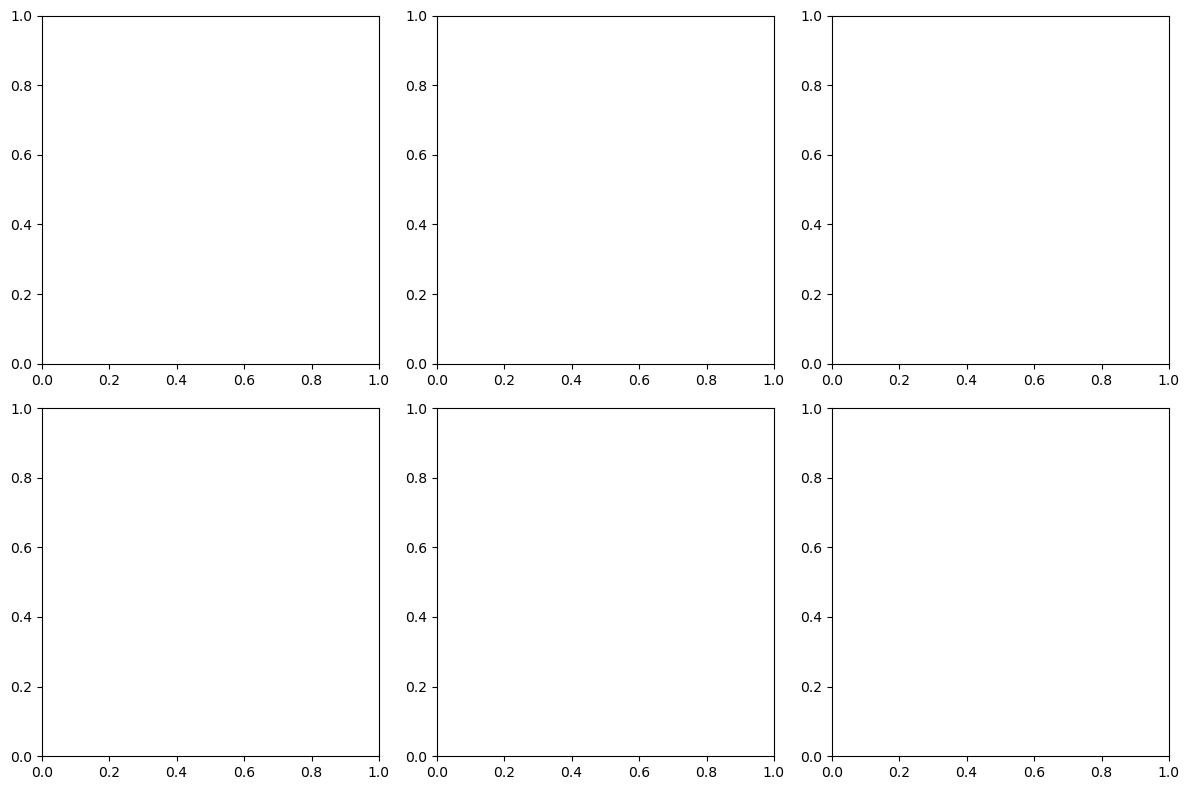

In [22]:
import random
import matplotlib.pyplot as plt
import os

# Define categories
categories = os.listdir(train_dir)  # Assuming train_dir has subfolders as categories

# Display one random image per category
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, category in enumerate(categories):
    category_path = os.path.join(train_dir, category)
    
    # Get only image files, avoiding directories
    img_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    if not img_files:
        continue  # Skip if no images found

    img_name = random.choice(img_files)
    img_path = os.path.join(category_path, img_name)
    
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()



### **2. Visualize Augmented Images (After Preprocessing)**

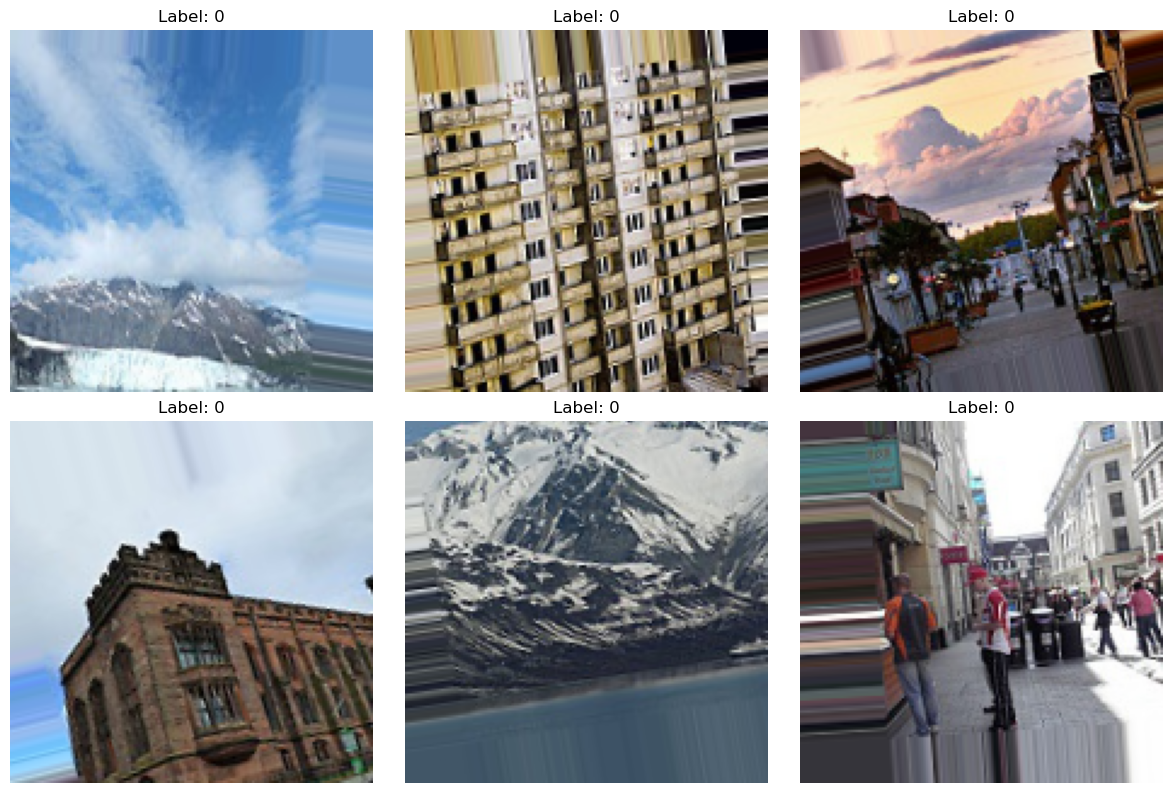

In [23]:
# Get a batch of training images
batch = next(train_generator)

# Extract images and labels
images, labels = batch

# Plot sample augmented images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i in range(6):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Label: {np.argmax(labels[i])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


### **3. Define the CNN Model**

Defines a sequential CNN model with 4 convolutional layers, each followed by max pooling.
Uses ReLU activation in convolutional layers and Softmax in the output layer for multi-class classification.
Includes a dropout layer to reduce overfitting.
Compiles the model using Adam optimizer and categorical cross-entropy loss.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])


### **3. Image-to-Label Mapping Before Classification**

In [24]:
label_map = train_generator.class_indices  # Dictionary mapping labels to numbers
print("Class Mapping:", label_map)


Class Mapping: {'seg_train': 0}


### **4. Train the Model**

Trains the CNN for a given number of epochs using the training set.
Uses the test set for validation.

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'  # Change from 'categorical' to 'sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # Change from 'categorical' to 'sparse'
    shuffle=False
)



Found 14034 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


In [16]:
epochs = 5  # Adjust as needed

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)


Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 129s 293ms/step - accuracy: 0.9900 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 130s 296ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 134s 305ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 135s 307ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 136s 310ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


### **5. Evaluate the Model**

Plots training and validation accuracy/loss curves.

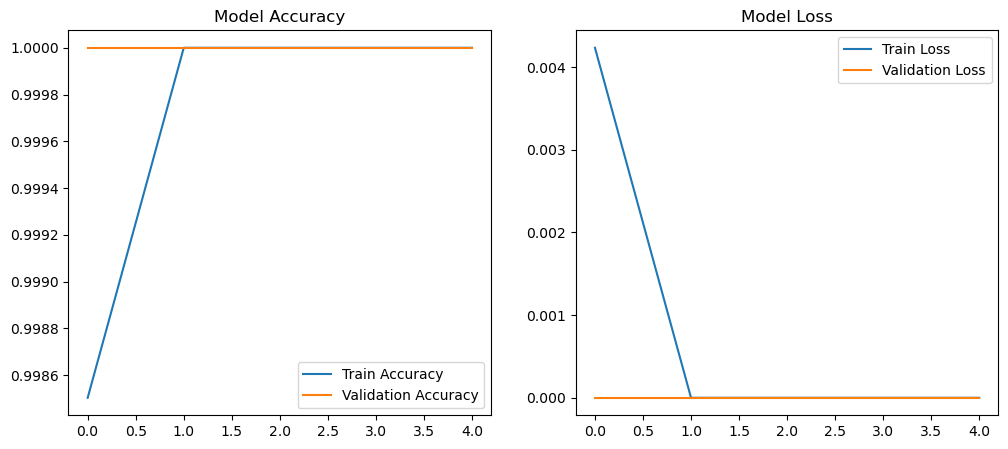

In [17]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


### **6. Generate Predictions & Confusion Matrix**

Predicts classes for test images.
Computes and prints a classification report.
Displays a confusion matrix for visual evaluation.

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



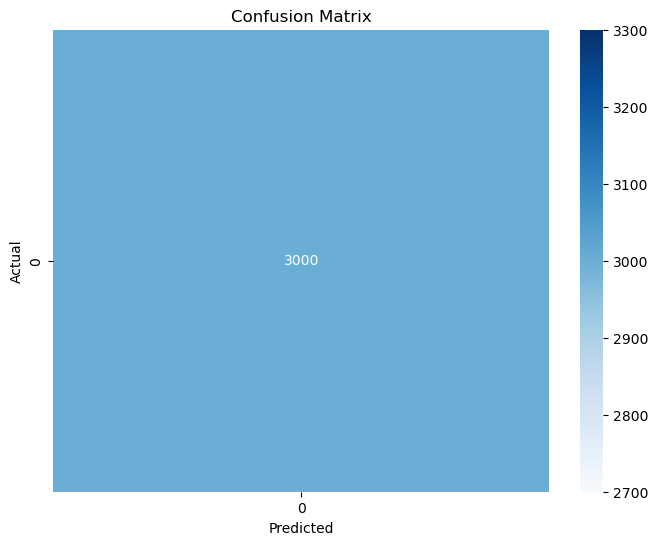

In [19]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### **4. Model Input Visualization**

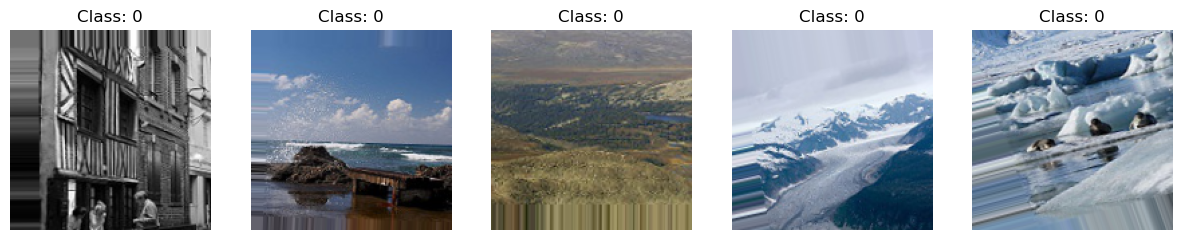

In [25]:
# Get first batch of images and labels
sample_images, sample_labels = next(train_generator)

# Display first few images the model sees
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes = axes.flatten()

for i in range(5):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"Class: {np.argmax(sample_labels[i])}")
    axes[i].axis("off")

plt.show()
